In [2]:
import pandas as pd

df_train = pd.read_csv('/Users/apple/Desktop/UMASS/Sem 2- Spring 23/Advance Data Mining/Project/train_motion_data.csv')
df_test = pd.read_csv('/Users/apple/Desktop/UMASS/Sem 2- Spring 23/Advance Data Mining/Project/test_motion_data.csv')

In [3]:
TIMESTEPS = 20 # the number of sample to be fed to the NN
FEATURES = 6
LABELS = 3
N_RECORDS = 11
# CNN constantS
N_STEPS = 5
N_LENGTH = TIMESTEPS // N_STEPS
N_ROWS = 1 # 1 for 1D data

In [4]:
df_train_normal = df_train.loc[df_train['Class'] == 'NORMAL']
df_train_slow = df_train.loc[df_train['Class'] == 'SLOW']
df_train_aggressive = df_train.loc[df_train['Class'] == 'AGGRESSIVE']

df_test_normal = df_test.loc[df_test['Class'] == 'NORMAL']
df_test_slow = df_test.loc[df_test['Class'] == 'SLOW']
df_test_aggressive = df_test.loc[df_test['Class'] == 'AGGRESSIVE']
df_train_normal

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
1195,-0.820672,2.556599,-0.617599,-0.031612,-0.865596,-0.962189,NORMAL,3582274
1196,-0.016871,1.171574,0.603792,0.253662,0.692110,0.537485,NORMAL,3582275
1197,2.488864,-1.001262,0.432143,0.140041,-0.080023,0.051847,NORMAL,3582275
1198,-0.680338,-0.048300,-3.298533,-0.169057,-0.383012,0.217392,NORMAL,3582276


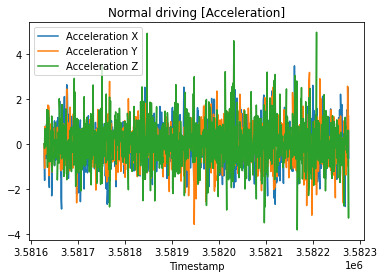

In [5]:
import matplotlib.pyplot as plt

plt.plot(df_train_normal['Timestamp'], df_train_normal['AccX'], label='Acceleration X')
plt.plot(df_train_normal['Timestamp'], df_train_normal['AccY'], label='Acceleration Y')
plt.plot(df_train_normal['Timestamp'], df_train_normal['AccZ'], label='Acceleration Z')

plt.title('Normal driving [Acceleration]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

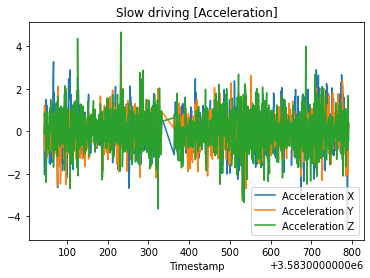

In [6]:
import matplotlib.pyplot as plt

plt.plot(df_train_slow['Timestamp'], df_train_slow['AccX'], label='Acceleration X')
plt.plot(df_train_slow['Timestamp'], df_train_slow['AccY'], label='Acceleration Y')
plt.plot(df_train_slow['Timestamp'], df_train_slow['AccZ'], label='Acceleration Z')

plt.title('Slow driving [Acceleration]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

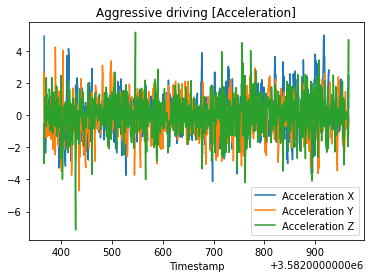

In [7]:
import matplotlib.pyplot as plt

plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccX'], label='Acceleration X')
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccY'], label='Acceleration Y')
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccZ'], label='Acceleration Z')

plt.title('Aggressive driving [Acceleration]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

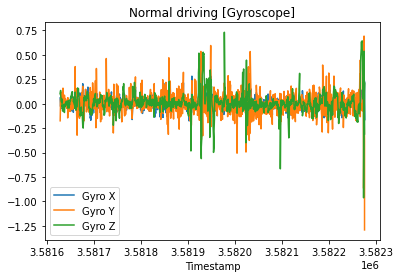

In [8]:
import matplotlib.pyplot as plt

plt.plot(df_train_normal['Timestamp'], df_train_normal['GyroX'], label='Gyro X')
plt.plot(df_train_normal['Timestamp'], df_train_normal['GyroY'], label='Gyro Y')
plt.plot(df_train_normal['Timestamp'], df_train_normal['GyroZ'], label='Gyro Z')

plt.title('Normal driving [Gyroscope]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

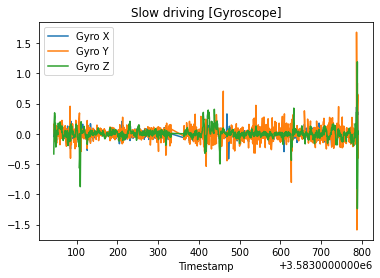

In [9]:
import matplotlib.pyplot as plt

plt.plot(df_train_slow['Timestamp'], df_train_slow['GyroX'], label='Gyro X')
plt.plot(df_train_slow['Timestamp'], df_train_slow['GyroY'], label='Gyro Y')
plt.plot(df_train_slow['Timestamp'], df_train_slow['GyroZ'], label='Gyro Z')

plt.title('Slow driving [Gyroscope]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

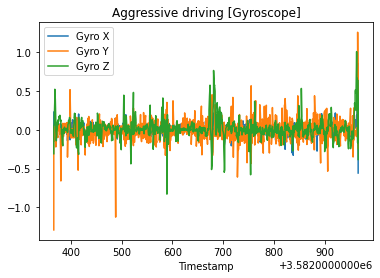

In [10]:
import matplotlib.pyplot as plt

plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroX'], label='Gyro X')
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroY'], label='Gyro Y')
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroZ'], label='Gyro Z')

plt.title('Aggressive driving [Gyroscope]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

In [11]:
df_train_slow = df_train_slow.iloc[N_RECORDS:]
df_train_slow = df_train_slow.iloc[:-N_RECORDS]

df_test_slow = df_test_slow.iloc[N_RECORDS:]
df_test_slow = df_test_slow.iloc[:-N_RECORDS]

df_train_normal = df_train_normal.iloc[N_RECORDS:]
df_train_normal = df_train_normal.iloc[:-N_RECORDS]

df_test_normal = df_test_normal.iloc[N_RECORDS:]
df_test_normal = df_test_normal.iloc[:-N_RECORDS]

df_train_aggressive = df_train_aggressive.iloc[N_RECORDS:]
df_train_aggressive = df_train_aggressive.iloc[:-N_RECORDS]

df_test_aggressive = df_test_aggressive.iloc[N_RECORDS:]
df_test_aggressive = df_test_aggressive.iloc[:-N_RECORDS]

In [12]:
train_slow_samples = df_train_slow.__len__()
train_normal_samples = df_train_normal.__len__()
train_aggressive_samples = df_train_aggressive.__len__()

print('---Train---')
print('Slow samples: ' + str(train_slow_samples))
print('Normal samples: ' + str(train_normal_samples))
print('Aggressive samples: ' + str(train_aggressive_samples))

df_train_slow = df_train_slow.tail(1300)
df_train_normal = df_train_normal.tail(1160)
df_train_aggressive = df_train_aggressive.tail(1080)

---Train---
Slow samples: 1309
Normal samples: 1178
Aggressive samples: 1091


In [13]:
test_slow_samples = df_test_slow.__len__()
test_normal_samples = df_test_normal.__len__()
test_aggressive_samples = df_test_aggressive.__len__()

print('---Test---')
print('Slow samples: ' + str(test_slow_samples))
print('Normal samples: ' + str(test_normal_samples))
print('Aggressive samples: ' + str(test_aggressive_samples))

df_test_slow = df_test_slow.tail(1240)
df_test_normal = df_test_normal.tail(960)
df_test_aggressive = df_test_aggressive.tail(780)

---Test---
Slow samples: 1251
Normal samples: 975
Aggressive samples: 792


In [14]:
# Features
X_train_normal = df_train_normal.iloc[: , :FEATURES]
X_train_slow = df_train_slow.iloc[: , :FEATURES]
X_train_aggressive = df_train_aggressive.iloc[: , :FEATURES]

X_test_normal = df_test_normal.iloc[: , :FEATURES]
X_test_slow = df_test_slow.iloc[: , :FEATURES]
X_test_aggressive = df_test_aggressive.iloc[: , :FEATURES]

# Labels
y_train_normal = df_train_normal.Class
y_train_slow = df_train_slow.Class
y_train_aggressive = df_train_aggressive.Class

y_test_normal = df_test_normal.Class
y_test_slow = df_test_slow.Class
y_test_aggressive = df_test_aggressive.Class


In [15]:
X_train = pd.concat([X_train_slow, X_train_normal, X_train_aggressive])
y_train = pd.concat([y_train_slow, y_train_normal, y_train_aggressive])

X_test = pd.concat([X_test_slow, X_test_normal, X_test_aggressive])
y_test = pd.concat([y_test_slow, y_test_normal, y_test_aggressive])


In [16]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)


In [17]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=LABELS)
y_test = to_categorical(y_test, num_classes=LABELS)
y_train

2023-05-04 11:44:16.837134: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.4839336 , -0.08337304, -0.33931214,  2.18302295,  0.01454199,
         1.64741375],
       [-1.01215716,  0.1762648 , -0.50957035,  0.65279912,  0.10228656,
         1.05597812],
       [-0.79472189, -0.77454781,  0.31721177,  0.91304125,  0.66714215,
         1.13877911],
       ...,
       [-0.60472951, -0.05863027,  0.21523563,  0.67361841, -0.16643117,
         3.25611835],
       [-0.96709366,  1.72553239, -0.23013029,  1.09000576, -0.5777338 ,
         2.38079366],
       [-0.40252228,  0.54752309, -0.04535424,  1.5584417 , -0.55031365,
         4.71696446]])

In [19]:
train_samples = X_train.shape[0]//TIMESTEPS
X_train = X_train.reshape(train_samples, TIMESTEPS, FEATURES)

test_samples = X_test.shape[0]//TIMESTEPS
X_test = X_test.reshape(test_samples, TIMESTEPS, FEATURES)

print('Train features shape: ' + str(X_train.shape[0]))
print('Test features shape: ' + str(X_test.shape[0]))

Train features shape: 177
Test features shape: 149


In [20]:
y_train = y_train[::TIMESTEPS]
y_test = y_test[::TIMESTEPS]

print('Train labels shape: ' + str(y_train.shape[0]))
print('Test labels shape: ' + str(y_test.shape[0]))

Train labels shape: 177
Test labels shape: 149


In [21]:
import tensorflow as tf
from tensorflow import keras, lite
from tensorflow.keras.layers import Dense, Dropout, Flatten, ConvLSTM2D, LSTM, RepeatVector
import keras_tuner as kt


tf.random.set_seed(42)


def model_builder(hp):
    model = tf.keras.Sequential()

    model.add(LSTM(hp.Int('input_unit', min_value=32, max_value=512, step=32), input_shape=(TIMESTEPS, FEATURES), return_sequences=True))
        
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(
            hp.Int(f'lstm_{i}_units', min_value=32, max_value=512, step=32),
            dropout=hp.Float(f'dropout_{i}_rate', min_value=0, max_value=0.5, step=0.1),
            return_sequences=True
        ))

    model.add(LSTM(hp.Int('lstm_output_neurons', min_value=32, max_value=512, step=32), return_sequences=False))

    model.add(Dropout(hp.Float('output_dropout_rate', min_value=0, max_value=0.5, step=0.1)))

    model.add(Dense(hp.Int('dense_neurons', min_value=32, max_value=512, step=32)))

    model.add(Dense(LABELS, activation='softmax'))
    

    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])

    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        metrics=[
            tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )

    return model

In [22]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=20,
                     factor=3,
                     directory='lstm_dir',
                     project_name='driving_behavior')

INFO:tensorflow:Reloading Tuner from lstm_dir/driving_behavior/tuner0.json


In [23]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [24]:
tuner.search(
        x=X_train,
        y=y_train,
        epochs=20,
        validation_data=(X_test, y_test),
        callbacks=[stop_early], 
        shuffle=True
)

Trial 90 Complete [00h 01m 30s]
val_accuracy: 0.5302013158798218

Best val_accuracy So Far: 0.6241610646247864
Total elapsed time: 00h 07m 00s
INFO:tensorflow:Oracle triggered exit


In [25]:
best_model = tuner.get_best_models()[0]

2023-05-04 11:53:05.233899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 11:53:05.237052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 11:53:05.239792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [26]:
eval_result = best_model.evaluate(X_test, y_test)

2023-05-04 11:53:12.759924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 11:53:12.762819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 11:53:12.765787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5/5 [==============================] - 4s 248ms/step - loss: 0.9906 - accuracy: 0.6242 - precision: 0.6829 - recall: 0.1879


In [27]:
y_pred=best_model.predict(x=X_test)

2023-05-04 11:53:26.459279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 11:53:26.462218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 11:53:26.464835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5/5 [==============================] - 4s 224ms/step


In [28]:
df_predicted = pd.DataFrame(y_pred, columns=['AGGRESSIVE', 'NORMAL', 'SLOW'])
df_predicted

,AGGRESSIVE,NORMAL,SLOW
0,0.115790,0.424292,0.459918
1,0.230003,0.391370,0.378626
2,0.150922,0.409434,0.439644
3,0.152432,0.412000,0.435568
4,0.159198,0.418227,0.422575
...,...,...,...
144,0.615964,0.213236,0.170800
145,0.666404,0.197962,0.135634
146,0.149729,0.434617,0.415654
147,0.086201,0.432157,0.481641


In [29]:
import numpy as np

actual_y_test = np.argmax(y_test, axis=1)
array_actual = labelEncoder.inverse_transform(actual_y_test)


df_actual = pd.DataFrame(array_actual, columns = ['Original Class'])
df_actual

,Original Class
0,SLOW
1,SLOW
2,SLOW
3,SLOW
4,SLOW
...,...
144,AGGRESSIVE
145,AGGRESSIVE
146,AGGRESSIVE
147,AGGRESSIVE


In [30]:
df_result = pd.concat([df_predicted, df_actual], axis=1)
df_result

,AGGRESSIVE,NORMAL,SLOW,Original Class
0,0.115790,0.424292,0.459918,SLOW
1,0.230003,0.391370,0.378626,SLOW
2,0.150922,0.409434,0.439644,SLOW
3,0.152432,0.412000,0.435568,SLOW
4,0.159198,0.418227,0.422575,SLOW
...,...,...,...,...
144,0.615964,0.213236,0.170800,AGGRESSIVE
145,0.666404,0.197962,0.135634,AGGRESSIVE
146,0.149729,0.434617,0.415654,AGGRESSIVE
147,0.086201,0.432157,0.481641,AGGRESSIVE


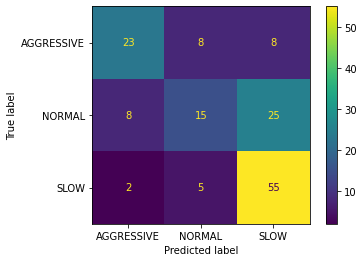

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(actual_y_test, y_pred)

classes = ['AGGRESSIVE', 'NORMAL', 'SLOW']
disp = ConfusionMatrixDisplay.from_predictions(actual_y_test, y_pred, display_labels=classes)

plt.rcParams['figure.figsize'] = [20, 10]
plt.show()


In [32]:
df_result.to_csv('lstm_20.csv')